In [894]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
# import matplotlib.pylab as pylab
# import matplotlib
# import numpy as np
import pandas as pd
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [895]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv("data/test.csv")

In [896]:
# %matplotlib inline
# mpl.style.use('ggplot')
# sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

# Wizualizacja

Survived jest naszą zmienną wynikową lub zależną. Jest to binarny nominalny typ danych 1 dla przetrwanych i 0 dla nie przetrwał.
Zmienne PassengerID i Ticket są losowymi unikalnymi identyfikatorami, które nie mają wpływu na zmienną wynikową. W związku z tym zostaną wykluczone z analizy.
Zmienna Pclass jest porządkowym typem danych dla klasy biletu, reprezentującym 1 = klasa wyższa, 2 = klasa średnia i 3 = klasa niższa.
Zmienne Sex(płeć) i Embarked(zaokrętowany) są nominalnym typem danych. Zostaną one przekonwertowane na zmienne fikcyjne do obliczeń matematycznych.
Zmienna Age(wiek) i Fare(opłata) są ciągłymi ilościowymi typami danych.
SibSp reprezentuje liczbę spokrewnionego rodzeństwa / małżonka na pokładzie, a Parch reprezentuje liczbę spokrewnionych rodziców / dzieci na pokładzie.
Zmienna Name informuje o płci oraz ewentualnym stopniu naukowym.
Zmienna Cabin nie zostanie użyta ze względu na zbyt dużą liczbę pustych pól.

In [897]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [898]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jenkin, Mr. Stephen Curnow",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [899]:
train.shape

(891, 12)

In [900]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [901]:
def embarked_number(data):
    
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 1
    data.loc[data["Embarked"] == "C", "Embarked"] = 2
    data.loc[data["Embarked"] == "Q", "Embarked"] = 3

In [902]:
embarked_number(train)

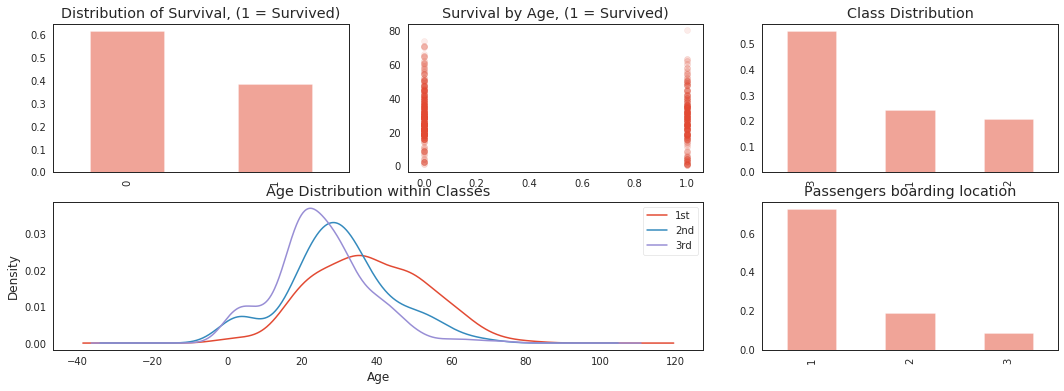

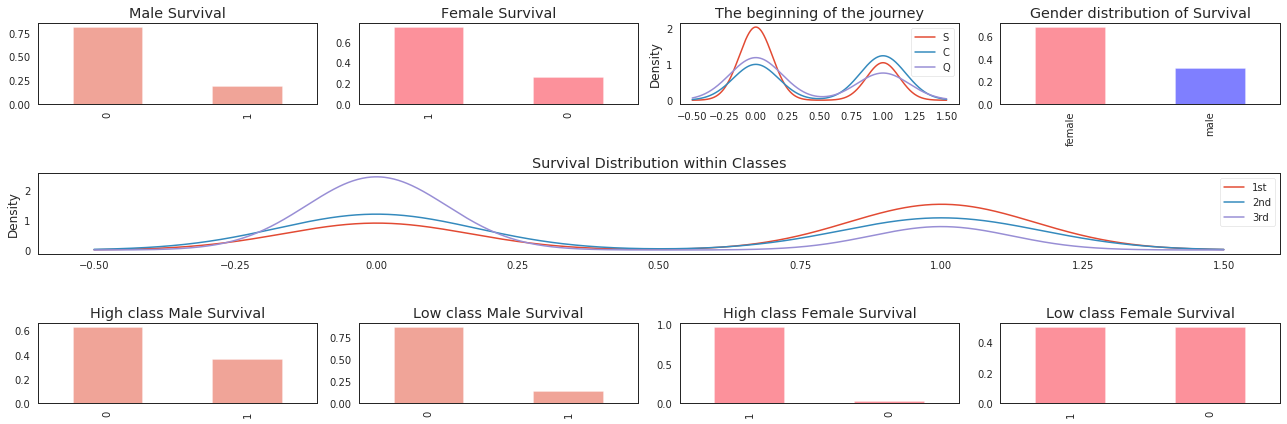

In [903]:
fig = plt.figure(figsize=(18, 6))
plt.subplot2grid((2, 3), (0, 0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of Survival, (1 = Survived)')

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(train.Survived, train.Age, alpha=0.1)
plt.title('Survival by Age, (1 = Survived)')

plt.subplot2grid((2, 3), (0, 2))
train.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Class Distribution')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
for x in [1, 2, 3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.xlabel("Age")
plt.title('Age Distribution within Classes')
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((2, 3), (1, 2))
train.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Passengers boarding location')


fig = plt.figure(figsize=(18, 6))
female_color = '#FA2539'
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

plt.subplot2grid((3, 4), (0, 0))
train.Survived[train.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Male Survival')

plt.subplot2grid((3, 4), (0, 1))
train.Survived[train.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Female Survival')

plt.subplot2grid((3, 4), (0, 2)) ###
for x in [1, 2, 3]:
    train.Survived[train.Embarked == x].plot(kind='kde')
plt.title("The beginning of the journey")
plt.legend(('S', 'C', 'Q'))

plt.subplot2grid((3, 4), (0, 3))
train.Sex[train.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Gender distribution of Survival')

plt.subplot2grid((3, 4), (1, 0), colspan=4)
for x in [1, 2, 3]:
    train.Survived[train.Pclass == x].plot(kind='kde')
plt.title("Survival Distribution within Classes")
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((3, 4), (2, 0))
train.Survived[(train.Sex == 'male') & (train.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("High class Male Survival")

plt.subplot2grid((3, 4), (2, 1))
train.Survived[(train.Sex == 'male') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Low class Male Survival")

plt.subplot2grid((3, 4), (2, 2))
train.Survived[(train.Sex == 'female') & (train.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title("High class Female Survival")

plt.subplot2grid((3, 4), (2, 3))
train.Survived[(train.Sex == 'female') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title("Low class Female Survival")
plt.tight_layout()

Jak widać na wykresach największy wpływ na przeżycie miała płeć. Istotna były również klasa w której podróżowano. Jak można zaobserwować przeżyło niemal 100% kobiet mających bilet pierwszej klasy i zginęło ponad 80% mężczyzn mający bilet trzeciej klasy.

# Wstępna analiza na podstawie płci

Analiza polega na stworzeniu parametru "Result", który przyporządkuje 1 dla każdej kobiety która przezyła, oraz dla każdego mężczyzny który zginął. Wykonam również analizę dla osób do 18 roku życia.

In [904]:
train['Hyp'] = 0
train.loc[train.Sex == 'female', 'Hyp'] = 1

In [905]:
train['Result'] = 0
train.loc[train.Survived == train['Hyp'], 'Result'] = 1

In [906]:
train['Result'].value_counts()

1    701
0    190
Name: Result, dtype: int64

In [907]:
train['Result'].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [908]:
train["Child"] = float('NaN')
train.loc[train["Age"] >= 18, "Child"] = 0
train.loc[train["Age"] < 18, "Child"] = 1

In [909]:
train["Survived"][train["Child"] == 1].value_counts()

1    61
0    52
Name: Survived, dtype: int64

In [910]:
train["Survived"][train["Child"] == 1].value_counts(normalize = True)

1    0.539823
0    0.460177
Name: Survived, dtype: float64

In [911]:
test_one = test
test_one["Survived"] = 0
test_one.loc[test_one["Sex"] == 'female', "Survived"] = 1
test_one.to_csv("data/gender_model.csv", index = False, columns = ["PassengerId", "Survived"])

Jak widać na podstawie płci pasażera możemy z ponad 78% skutecznością przewidzieć winik.
To czy osoba podróżująca miała poniżej 18 lat nie miało wpływu na wynik.

# Przygotowanie danych

In [912]:
train = train.drop(["Hyp", "Result"], axis=1)

In [913]:
def clean_data(data): # utils or clean   
    data["Fare"].fillna(data["Fare"].median(), inplace=True)
    data["Age"].fillna(data["Age"].median(), inplace=True)
    
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    
    #data["Embarked"] = data["Embarked"].fillna("S")
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    
    drop_column = ['Cabin', 'Ticket']
    data.drop(drop_column, axis=1, inplace = True)

In [914]:
clean_data(train)
clean_data(test)

In [915]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 1
train['IsAlone'].loc[train['FamilySize'] > 1] = 0

In [916]:
 train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [917]:
train['FareBin'] = pd.qcut(train['Fare'], 4)

In [918]:
train['AgeBin'] = pd.cut(train['Age'].astype(int), 5)

In [919]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Child,FamilySize,IsAlone,Title,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0.0,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,0.0,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0.0,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0.0,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0.0,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,0.0,1,1,Rev,"(7.91, 14.454]","(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,0.0,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,1,NaN,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,0.0,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


In [920]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Child,FamilySize,IsAlone,Title,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0.0,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,0.0,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0.0,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0.0,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0.0,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,0.0,1,1,Rev,"(7.91, 14.454]","(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,0.0,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,1,NaN,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,0.0,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


# Modele

In [921]:
from sklearn import linear_model, preprocessing, tree, model_selection, ensemble

In [922]:
def write_prediction(prediction, name):
    PassengerId = np.array(test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])

In [923]:
target = train["Survived"].values
feature_names = ["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]
features = train[feature_names].values

### Logistic Regression

In [924]:
logistic = linear_model.LogisticRegression()
logistic.fit(features, target)
logistic.score(features, target)

0.8024691358024691

In [925]:
scores = model_selection.cross_val_score(logistic, features, target, scoring='accuracy', cv=10)

In [926]:
scores

array([0.77777778, 0.78888889, 0.7752809 , 0.83146067, 0.78651685,
       0.7752809 , 0.78651685, 0.7752809 , 0.82022472, 0.81818182])

In [927]:
scores.mean()

0.7935410282601294

In [928]:
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
write_prediction(logistic.predict(test_features), "data/logistic_regression.csv")

### Polynomial Features

In [929]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_ = poly.fit_transform(features)
classifier = classifier.fit(poly_, target)
classifier.score(poly_, target)

0.8383838383838383

In [930]:
scores = model_selection.cross_val_score(classifier, poly_, target, scoring='accuracy', cv=10)

In [931]:
scores

array([0.81111111, 0.81111111, 0.7752809 , 0.87640449, 0.85393258,
       0.78651685, 0.82022472, 0.7752809 , 0.86516854, 0.81818182])

In [932]:
scores.mean()

0.8193213029168085

In [933]:
test_features_ = poly.fit_transform(test_features)
write_prediction(classifier.predict(test_features_), "data/logistic_regression_poly.csv")

### Decision Tree Classifier

In [934]:
features = train[["Pclass", "Sex", "Age", "Fare"]].values
features_two = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

In [935]:
decision_tree = tree.DecisionTreeClassifier(random_state=1)
decision_tree_ = decision_tree.fit(features, target)
decision_tree_.score(features, target)

0.9775533108866442

In [936]:
decision_tree.feature_importances_

array([0.1269655 , 0.31274009, 0.23147703, 0.32881738])

In [937]:
scores = model_selection.cross_val_score(decision_tree, features, target, scoring='accuracy', cv=50) 
scores

array([0.77777778, 0.66666667, 0.83333333, 0.94444444, 0.77777778,
       0.77777778, 0.61111111, 0.88888889, 0.66666667, 0.83333333,
       0.72222222, 0.66666667, 0.66666667, 0.72222222, 0.55555556,
       0.83333333, 0.94444444, 0.83333333, 0.77777778, 0.77777778,
       0.83333333, 0.83333333, 0.83333333, 0.77777778, 0.61111111,
       0.88888889, 0.83333333, 0.83333333, 0.72222222, 0.83333333,
       0.72222222, 0.66666667, 0.88888889, 0.94444444, 0.88888889,
       0.72222222, 0.66666667, 0.77777778, 0.77777778, 0.72222222,
       0.88888889, 0.77777778, 0.88235294, 0.76470588, 0.76470588,
       0.76470588, 0.76470588, 0.88235294, 0.94117647, 0.9375    ])

In [938]:
scores.mean()

0.7884885620915033

In [939]:
decision_tree_two = tree.DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 2,
    random_state = 1)
decision_tree_two = decision_tree_two.fit(features_two, target)

In [940]:
decision_tree_two.feature_importances_

array([0.16289604, 0.13683043, 0.47976487, 0.14661755, 0.04973834,
       0.01414005, 0.01001273])

In [941]:
decision_tree_two.score(features_two, target)

0.8787878787878788

In [942]:
scores = model_selection.cross_val_score(decision_tree_two, features_two, target, scoring='accuracy', cv=50) 
scores

array([0.77777778, 0.66666667, 0.77777778, 0.94444444, 0.83333333,
       0.88888889, 0.61111111, 0.83333333, 0.88888889, 0.88888889,
       0.72222222, 0.66666667, 0.83333333, 0.77777778, 0.72222222,
       0.83333333, 0.94444444, 0.72222222, 0.94444444, 0.83333333,
       0.88888889, 0.83333333, 0.83333333, 0.88888889, 0.88888889,
       0.83333333, 0.83333333, 0.83333333, 0.77777778, 0.88888889,
       0.72222222, 0.66666667, 0.88888889, 0.88888889, 0.83333333,
       0.77777778, 0.72222222, 0.66666667, 0.88888889, 0.77777778,
       0.83333333, 0.88888889, 0.88235294, 0.94117647, 0.82352941,
       0.70588235, 0.88235294, 0.82352941, 1.        , 0.9375    ])

In [943]:
scores.mean()

0.8232598039215686

In [944]:
tree.export_graphviz(decision_tree_two, feature_names=feature_names, out_file="data/decision_tree_two.dot")
# dot -Tpng decision_tree_two.dot > decision_tree_two.png

In [945]:
test_features_two = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_two = decision_tree_two.predict(test_features_two)
write_prediction(prediction_two, "data/decision_tree_two.csv")

### Random Forest

In [946]:
features = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

In [947]:
forest = ensemble.RandomForestClassifier(
    max_depth = 7,
    min_samples_split = 4,
    n_estimators = 1000,
    random_state = 1,
    n_jobs = -1
)
forest = forest.fit(features, target)

In [948]:
forest.feature_importances_

array([0.12765467, 0.14461609, 0.40192252, 0.19655999, 0.05586411,
       0.03997785, 0.03340478])

In [949]:
forest.score(features, target)

0.8866442199775533

In [950]:
scores = model_selection.cross_val_score(forest, features, target, scoring='accuracy', cv=10)

In [951]:
scores

array([0.77777778, 0.81111111, 0.73033708, 0.88764045, 0.93258427,
       0.83146067, 0.80898876, 0.7752809 , 0.86516854, 0.84090909])

In [952]:
scores.mean()

0.8261258653955282

In [953]:
test_features_forest = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_forest = forest.predict(test_features_forest)
write_prediction(prediction_forest, "data/random_forest.csv")

### Gradient Boosting Classifier

In [954]:
grid_search = model_selection.GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.001,
        min_samples_split=40,
        min_samples_leaf=1,
        max_features=2,
        max_depth=12,
        n_estimators=70,
        subsample=0.85,
        random_state=10), 
    param_grid = {'n_estimators':[1500, 2240],
                 'subsample':[0.85, 0.86]},
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=10)

In [955]:
grid_search.fit(features, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None,
                                                  learning_rate=0.001,
                                                  loss='deviance', max_depth=12,
                                                  max_features=2,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=40,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=70,
                                                  n_iter_no_change=None,
       

In [956]:
grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=0.001, loss='deviance', max_depth=12,
                            max_features=2, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=40,
                            min_weight_fraction_leaf=0.0, n_estimators=2240,
                            n_iter_no_change=None, presort='auto',
                            random_state=10, subsample=0.85, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 {'n_estimators': 2240, 'subsample': 0.85},
 0.8775332880626998)

In [957]:
gbm = ensemble.GradientBoostingClassifier(
    learning_rate = 0.005,
    min_samples_split=40,
    min_samples_leaf=1,
    max_features=2,
    max_depth=12,
    n_estimators=1500,
    subsample=0.75,
    random_state=1)
gbm = gbm.fit(features, target)

In [958]:
gbm.feature_importances_

array([0.09639431, 0.229881  , 0.28701977, 0.26533852, 0.04990704,
       0.03877946, 0.03267989])

In [959]:
gbm.score(features, target)

0.9405162738496072

In [960]:
scores = model_selection.cross_val_score(gbm, features, target, scoring='accuracy', cv=20)

In [961]:
scores

array([0.69565217, 0.89130435, 0.75555556, 0.84444444, 0.75555556,
       0.8       , 0.8       , 0.88888889, 0.91111111, 0.88636364,
       0.84090909, 0.81818182, 0.77272727, 0.90909091, 0.79545455,
       0.75      , 0.86363636, 0.86363636, 0.81818182, 0.88636364])

In [962]:
scores.mean()

0.827352876592007

In [963]:
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_gbm = gbm.predict(test_features)
write_prediction(prediction_gbm, "data/gbm.csv")